# WORD EMBEDDING
Word Embedding is an approach for representing words and documents. Word Embedding or Word Vector is a numeric vector input that represents a word in a lower-dimensional space. It allows words with similar meanings to have a similar representation.

Word Embeddings are a method of extracting features out of text so that we can input those features into a machine learning model to work with text data. They try to preserve syntactical and semantic information. The methods such as Bag of Words (BOW), CountVectorizer and TFIDF rely on the word count in a sentence but do not save any syntactical or semantic information. In these algorithms, the size of the vector is the number of elements in the vocabulary. We can get a sparse matrix if most of the elements are zero. Large input vectors will mean a huge number of weights which will result in high computation required for training. Word Embeddings give a solution to these problems.

## Need for Word Embedding?
To reduce dimensionality
To use a word to predict the words around it.
Inter-word semantics must be captured.
How are Word Embeddings used?
They are used as input to machine learning models.
Take the words —-> Give their numeric representation —-> Use in training or inference.
To represent or visualize any underlying patterns of usage in the corpus that was used to train them.
Let’s take an example to understand how word vector is generated by taking emotions which are most frequently used in certain conditions and transform each emoji into a vector and the conditions will be our features.

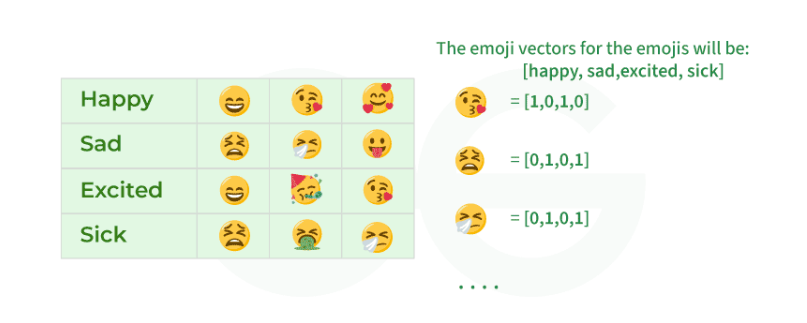

## One Hot Encoding
One-hot encoding is a simple method for representing words in natural language processing (NLP). In this encoding scheme, each word in the vocabulary is represented as a unique vector, where the dimensionality of the vector is equal to the size of the vocabulary. The vector has all elements set to 0, except for the element corresponding to the index of the word in the vocabulary, which is set to 1.
While one-hot encoding is a simple and intuitive method for representing words in NLP, it has several disadvantages, which may limit its effectiveness in certain applications.

- One-hot encoding results in high-dimensional vectors, making it computationally expensive and memory-intensive, especially with large vocabularies.
- It does not capture semantic relationships between words; each word is treated as an isolated entity without considering its meaning or context.
- It is restricted to the vocabulary seen during training, making it unsuitable for handling out-of-vocabulary words.

In [9]:
def one_hot_encode(text):
	words = text.split()
	vocabulary = set(words)
	word_to_index = {word: i for i, word in enumerate(vocabulary)}
	one_hot_encoded = []
	for word in words:
		one_hot_vector = [0] * len(vocabulary)
		one_hot_vector[word_to_index[word]] = 1
		one_hot_encoded.append(one_hot_vector)

	return one_hot_encoded, word_to_index, vocabulary

# sample
example_text = "cat in the hat dog on the mat bird in the tree"

one_hot_encoded, word_to_index, vocabulary = one_hot_encode(example_text)

print("Vocabulary:", vocabulary)
print("Word to Index Mapping:", word_to_index)
print("One-Hot Encoded Matrix:")
for word, encoding in zip(example_text.split(), one_hot_encoded):
	print(f"{word}: {encoding}")


Vocabulary: {'bird', 'hat', 'on', 'dog', 'the', 'cat', 'mat', 'in', 'tree'}
Word to Index Mapping: {'bird': 0, 'hat': 1, 'on': 2, 'dog': 3, 'the': 4, 'cat': 5, 'mat': 6, 'in': 7, 'tree': 8}
One-Hot Encoded Matrix:
cat: [0, 0, 0, 0, 0, 1, 0, 0, 0]
in: [0, 0, 0, 0, 0, 0, 0, 1, 0]
the: [0, 0, 0, 0, 1, 0, 0, 0, 0]
hat: [0, 1, 0, 0, 0, 0, 0, 0, 0]
dog: [0, 0, 0, 1, 0, 0, 0, 0, 0]
on: [0, 0, 1, 0, 0, 0, 0, 0, 0]
the: [0, 0, 0, 0, 1, 0, 0, 0, 0]
mat: [0, 0, 0, 0, 0, 0, 1, 0, 0]
bird: [1, 0, 0, 0, 0, 0, 0, 0, 0]
in: [0, 0, 0, 0, 0, 0, 0, 1, 0]
the: [0, 0, 0, 0, 1, 0, 0, 0, 0]
tree: [0, 0, 0, 0, 0, 0, 0, 0, 1]


## Bag of Words
Bag-of-Words (BoW) is a text representation technique that represents a document as an unordered set of words and their respective frequencies. It discards the word order and captures the frequency of each word in the document, creating a vector representation.
While BoW is a simple and interpretable representation, below disadvantages highlight its limitations in capturing certain aspects of language structure and semantics:

- BoW ignores the order of words in the document, leading to a loss of sequential information and context making it less effective for tasks where word order is crucial, such as in natural language understanding.
- BoW representations are often sparse, with many elements being zero resulting in increased memory requirements and computational inefficiency, especially when dealing with large datasets.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
documents = ["This is the first document.",
			"This document is the second document.",
			"And this is the third one.",
			"Is this the first document?"]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)
feature_names = vectorizer.get_feature_names_out()

print("Bag-of-Words Matrix:")
print(X.toarray())
print("Vocabulary (Feature Names):", feature_names)


Bag-of-Words Matrix:
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]
Vocabulary (Feature Names): ['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


## TF-IDF
Term Frequency-Inverse Document Frequency, commonly known as TF-IDF, is a numerical statistic that reflects the importance of a word in a document relative to a collection of documents (corpus). It is widely used in natural language processing and information retrieval to evaluate the significance of a term within a specific document in a larger corpus. TF-IDF consists of two components:

- Term Frequency (TF): Term Frequency measures how often a term (word) appears in a document. It is calculated using the formula:
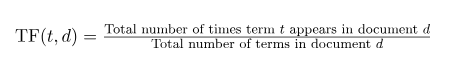         

- Inverse Document Frequency (IDF): Inverse Document Frequency measures the importance of a term across a collection of documents. It is calculated using the formula:
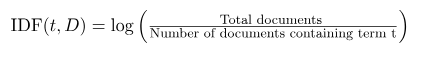        

- The TF-IDF score for a term t in a document d is then given by multiplying the TF and IDF values:

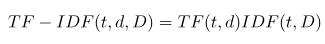         

The higher the TF-IDF score for a term in a document, the more important that term is to that document within the context of the entire corpus. This weighting scheme helps in identifying and extracting relevant information from a large collection of documents, and it is commonly used in text mining, information retrieval, and document clustering.

Let’s Implement Term Frequency-Inverse Document Frequency (TF-IDF) using python with the scikit-learn library. It begins by defining a set of sample documents. The TfidfVectorizer is employed to transform these documents into a TF-IDF matrix. The code then extracts and prints the TF-IDF values for each word in each document. This statistical measure helps assess the importance of words in a document relative to their frequency across a collection of documents, aiding in information retrieval and text analysis tasks.
TF-IDF is a widely used technique in information retrieval and text mining, but its limitations should be considered, especially when dealing with tasks that require a deeper understanding of language semantics. For example:

TF-IDF treats words as independent entities and doesn’t consider semantic relationships between them. This limitation hinders its ability to capture contextual information and word meanings.
Sensitivity to Document Length: Longer documents tend to have higher overall term frequencies, potentially biasing TF-IDF towards longer documents.

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample
documents = [
	"The quick brown fox jumps over the lazy dog.",
	"A journey of a thousand miles begins with a single step.",
]

vectorizer = TfidfVectorizer() # Create the TF-IDF vectorizer
tfidf_matrix = vectorizer.fit_transform(documents)
feature_names = vectorizer.get_feature_names_out()
tfidf_values = {}

for doc_index, doc in enumerate(documents):
	feature_index = tfidf_matrix[doc_index, :].nonzero()[1]
	tfidf_doc_values = zip(feature_index, [tfidf_matrix[doc_index, x] for x in feature_index])
	tfidf_values[doc_index] = {feature_names[i]: value for i, value in tfidf_doc_values}
#let's print
for doc_index, values in tfidf_values.items():
	print(f"Document {doc_index + 1}:")
	for word, tfidf_value in values.items():
		print(f"{word}: {tfidf_value}")
	print("\n")


Document 1:
dog: 0.30151134457776363
lazy: 0.30151134457776363
over: 0.30151134457776363
jumps: 0.30151134457776363
fox: 0.30151134457776363
brown: 0.30151134457776363
quick: 0.30151134457776363
the: 0.6030226891555273


Document 2:
step: 0.3535533905932738
single: 0.3535533905932738
with: 0.3535533905932738
begins: 0.3535533905932738
miles: 0.3535533905932738
thousand: 0.3535533905932738
of: 0.3535533905932738
journey: 0.3535533905932738




## Word to Vec
Word2Vec is a neural approach for generating word embeddings. It belongs to the family of neural word embedding techniques and specifically falls under the category of distributed representation models. It is a popular technique in natural language processing (NLP) that is used to represent words as continuous vector spaces. Developed by a team at Google, Word2Vec aims to capture the semantic relationships between words by mapping them to high-dimensional vectors. The underlying idea is that words with similar meanings should have similar vector representations. In Word2Vec every word is assigned a vector. We start with either a random vector or one-hot vector.

There are two neural embedding methods for Word2Vec, Continuous Bag of Words (CBOW) and Skip-gram.

Continuous Bag of Words (CBOW) is a type of neural network architecture used in the Word2Vec model. The primary objective of CBOW is to predict a target word based on its context, which consists of the surrounding words in a given window. Given a sequence of words in a context window, the model is trained to predict the target word at the center of the window.

CBOW is a feedforward neural network with a single hidden layer. The input layer represents the context words, and the output layer represents the target word. The hidden layer contains the learned continuous vector representations (word embeddings) of the input words.

The architecture is useful for learning distributed representations of words in a continuous vector space.
<img src="https://media.geeksforgeeks.org/wp-content/uploads/20200904032437/cbow.png" style="width:50%"></img>


The hidden layer contains the continuous vector representations (word embeddings) of the input words.

The weights between the input layer and the hidden layer are learned during training.
The dimensionality of the hidden layer represents the size of the word embeddings (the continuous vector space).
   
import torch

In [7]:
!pip install nltk
!pip install gensim

     ---------------------------------------- 60.3/60.3 kB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 42.5/42.5 MB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 14.8/14.8 MB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 10.4/10.4 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20448 sha256=0a22ca051cbca2de3e4632a1c0e104f704be23bdaf50c42ed7ef3fc9dd7a0f0d
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\01\02\ee\df0699282986903a384b69aab4413af9efd26b3612b5dccc9e
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3522 sha256=503492e53643deb90f778b442cda0bb85acd7bde0423fb81cad8fbedae67afd6
  Stored in directory: c:\users\lenovo\appd

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\LENOVO\\anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [5]:
# Python program to generate word vectors using Word2Vec

# importing all necessary modules
from gensim.models import Word2Vec
import gensim
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings

warnings.filterwarnings(action='ignore')


# Reads ‘alice.txt’ file
sample = open("text.txt")
s = sample.read()

# Replaces escape character with space
f = s.replace("\n", " ")

data = []

# iterate through each sentence in the file
for i in sent_tokenize(f):
	temp = []

	# tokenize the sentence into words
	for j in word_tokenize(i):
		temp.append(j.lower())

	data.append(temp)

# Create CBOW model
model1 = gensim.models.Word2Vec(data, min_count=1,
								vector_size=100, window=5)

# Print results
print("Cosine similarity between 'alice' " +
	"and 'wonderland' - CBOW : ",
	model1.wv.similarity('alice', 'wonderland'))

print("Cosine similarity between 'alice' " +
	"and 'follows' - CBOW : ",
	model1.wv.similarity('alice', 'follows'))

# Create Skip Gram model
model2 = gensim.models.Word2Vec(data, min_count=1, vector_size=100,
								window=5, sg=1)

# Print results
print("Cosine similarity between 'alice' " +
	"and 'wonderland' - Skip Gram : ",
	model2.wv.similarity('alice', 'wonderland'))

print("Cosine similarity between 'alice' " +
	"and 'follows' - Skip Gram : ",
	model2.wv.similarity('alice', 'follows'))


Cosine similarity between 'alice' and 'wonderland' - CBOW :  -0.06812347
Cosine similarity between 'alice' and 'follows' - CBOW :  0.09918544
Cosine similarity between 'alice' and 'wonderland' - Skip Gram :  -0.055460747
Cosine similarity between 'alice' and 'follows' - Skip Gram :  0.10005143


## GLOVE
GloVe is trained on global word co-occurrence statistics. It leverages the global context to create word embeddings that reflect the overall meaning of words based on their co-occurrence probabilities. this method, we take the corpus and iterate through it and get the co-occurrence of each word with other words in the corpus. We get a co-occurrence matrix through this. The words which occur next to each other get a value of 1, if they are one word apart then 1/2, if two words apart then 1/3 and so on.

Corpus:
It is a nice evening.
Good Evening!
Is it a nice evening?

Let us take an example to understand how the matrix is created. We have a small corpus:
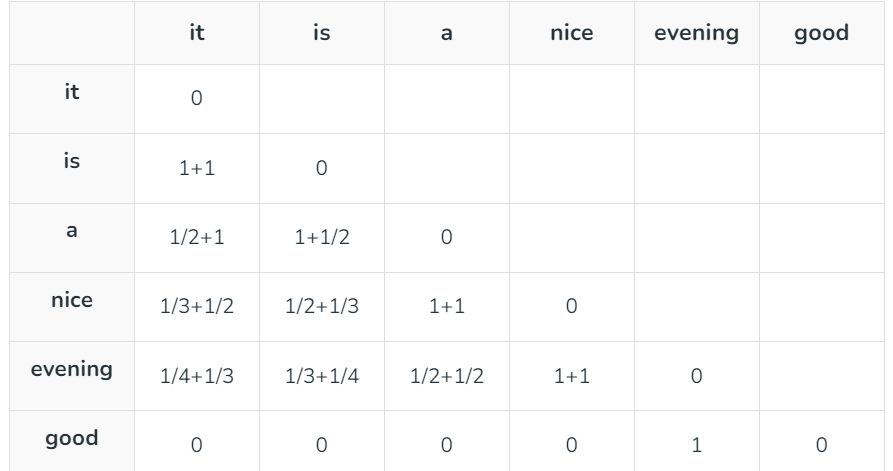

The upper half of the matrix will be a reflection of the lower half. We can consider a window frame as well to calculate the co-occurrences by shifting the frame till the end of the corpus. This helps gather information about the context in which the word is used.

Initially, the vectors for each word is assigned randomly. Then we take two pairs of vectors and see how close they are to each other in space. If they occur together more often or have a higher value in the co-occurrence matrix and are far apart in space then they are brought close to each other. If they are close to each other but are rarely or not frequently used together then they are moved further apart in space.

After many iterations of the above process, we’ll get a vector space representation that approximates the information from the co-occurrence matrix. The performance of GloVe is better than Word2Vec in terms of both semantic and syntactic capturing.

In [9]:
from gensim.models import KeyedVectors
from gensim.downloader import load

glove_model = load('glove-wiki-gigaword-50')
word_pairs = [('learn', 'learning'), ('india', 'indian'), ('fame', 'famous')]

# Compute similarity for each pair of words
for pair in word_pairs:
	similarity = glove_model.similarity(pair[0], pair[1])
	print(f"Similarity between '{pair[0]}' and '{pair[1]}' using GloVe: {similarity:.3f}")


[==================================================] 100.0% 66.0/66.0MB downloaded
Similarity between 'learn' and 'learning' using GloVe: 0.802
Similarity between 'india' and 'indian' using GloVe: 0.865
Similarity between 'fame' and 'famous' using GloVe: 0.589


## COSINE SIMILARITY
Cosine similarity is a metric, helpful in determining, how similar the data objects are irrespective of their size. We can measure the similarity between two sentences in Python using Cosine Similarity. In cosine similarity, data objects in a dataset are treated as a vector. The formula to find the cosine similarity between two vectors is –

S_C(x, y) = x . y / ||x|| \times ||y||
where,

x . y = product (dot) of the vectors ‘x’ and ‘y’.
||x|| and ||y|| = length (magnitude) of the two vectors ‘x’ and ‘y’.
||x|| \times ||y|| = regular product of the two vectors ‘x’ and ‘y’.
Example : Consider an example to find the similarity between two vectors – ‘x’ and ‘y’, using Cosine Similarity. The ‘x’ vector has values, x = { 3, 2, 0, 5 } The ‘y’ vector has values, y = { 1, 0, 0, 0 } The formula for calculating the cosine similarity is : S_C(x, y) = x . y / ||x|| \times ||y||

x . y = 3*1 + 2*0 + 0*0 + 5*0 = 3

||x|| = √ (3)^2 + (2)^2 + (0)^2 + (5)^2 = 6.16

||y|| = √ (1)^2 + (0)^2 + (0)^2 + (0)^2 = 1

∴ S_C(x, y) = 3 / (6.16 * 1) = 0.49 
The dissimilarity between the two vectors ‘x’ and ‘y’ is given by –

∴ D_C(x, y) = 1 - S_C(x, y) = 1 - 0.49 = 0.51
The cosine similarity between two vectors is measured in ‘θ’.
If θ = 0°, the ‘x’ and ‘y’ vectors overlap, thus proving they are similar.
If θ = 90°, the ‘x’ and ‘y’ vectors are dissimilar.

Cosine Similarity between two vectors


Advantages :

The cosine similarity is beneficial because even if the two similar data objects are far apart by the Euclidean distance because of the size, they could still have a smaller angle between them. Smaller the angle, higher the similarity.
When plotted on a multi-dimensional space, the cosine similarity captures the orientation (the angle) of the data objects and not the magnitud

In [2]:
# import required libraries
import numpy as np
from numpy.linalg import norm

# define two lists or array
A = np.array([2,1,2,3,2,9])
B = np.array([3,4,2,4,5,5])

print("A:", A)
print("B:", B)

# compute cosine similarity
cosine = np.dot(A,B)/(norm(A)*norm(B))
print("Cosine Similarity:", cosine)
# import required libraries
import numpy as np
from numpy.linalg import norm

# define two lists or array
A = np.array([[2,1,2],[3,2,9], [-1,2,-3]])
B = np.array([3,4,2])
print("A:\n", A)
print("B:\n", B)

# compute cosine similarity
cosine = np.dot(A,B)/(norm(A, axis=1)*norm(B))
print("Cosine Similarity:\n", cosine)
# import required libraries
import numpy as np
from numpy.linalg import norm

# define two arrays
A = np.array([[1,2,2],
			[3,2,2],
			[-2,1,-3]])
B = np.array([[4,2,4],
			[2,-2,5],
			[3,4,-4]])

print("A:\n", A)
print("B:\n", B)

# compute cosine similarity
cosine = np.sum(A*B, axis=1)/(norm(A, axis=1)*norm(B, axis=1))

print("Cosine Similarity:\n", cosine)
print("Cosine Similarity:\n", cosine)


A: [2 1 2 3 2 9]
B: [3 4 2 4 5 5]
Cosine Similarity: 0.8188504723485274
A:
 [[ 2  1  2]
 [ 3  2  9]
 [-1  2 -3]]
B:
 [3 4 2]
Cosine Similarity:
 [ 0.86657824  0.67035541 -0.04962917]
A:
 [[ 1  2  2]
 [ 3  2  2]
 [-2  1 -3]]
B:
 [[ 4  2  4]
 [ 2 -2  5]
 [ 3  4 -4]]
Cosine Similarity:
 [0.88888889 0.5066404  0.41739194]
Cosine Similarity:
 [0.88888889 0.5066404  0.41739194]
